Importing Dependencies

In [ ]:
!pip install scikeras --upgrade
!pip install scikit-learn --upgrade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Importing Data

In [ ]:
data=pd.read_csv('TASK-ML-INTERN.csv')

# Task-1: Data Exploration and Preprocess

In [ ]:
data.sample(5)

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
395,imagoai_corn_395,0.493367,0.504286,0.485930,0.471946,0.478705,0.473456,0.466760,0.470290,0.447366,...,0.791491,0.790374,0.814201,0.807443,0.811985,0.783479,0.797435,0.788128,0.814911,0.0
113,imagoai_corn_113,0.434537,0.440375,0.413597,0.432984,0.403129,0.393410,0.407267,0.388151,0.386586,...,0.728977,0.742006,0.725966,0.746148,0.735152,0.724748,0.716620,0.737378,0.729565,4400.0
424,imagoai_corn_424,0.502493,0.505571,0.463683,0.459179,0.465458,0.448924,0.442418,0.428286,0.441019,...,0.744474,0.761201,0.776980,0.772343,0.772171,0.764440,0.769027,0.764892,0.757240,560.0
491,imagoai_corn_491,0.361409,0.359057,0.363190,0.340261,0.358120,0.333963,0.327838,0.335757,0.323349,...,0.675551,0.660612,0.667313,0.655456,0.653041,0.653207,0.653225,0.648616,0.657780,600.0
287,imagoai_corn_287,0.475441,0.475895,0.456182,0.465987,0.481860,0.446201,0.429518,0.436081,0.426008,...,0.759464,0.753065,0.747686,0.753613,0.752469,0.746073,0.754812,0.748025,0.748179,4500.0


Inspecting the data

In [ ]:
print(data.shape)

(500, 450)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


checking for missing values

In [ ]:
print("\n--- Checking for Missing Values ---")
missing_values_count = data.isnull().sum()

missing_value_columns = missing_values_count[missing_values_count > 0]

if missing_value_columns.empty:
    print("No missing values found in any column.")
else:
    print("Columns with missing values:")
    print(missing_value_columns)


--- Checking for Missing Values ---
No missing values found in any column.


In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


identifying the spectral band columns

In [ ]:
print("\n--- Step 3: Identifying Spectral Band Columns ---")

# Assume 'hsi_id' is the first column and 'vomitoxin_ppb' is the last column
id_column_name = data.columns[0]         # Get the name of the first column
target_column_name = data.columns[-1]    # Get the name of the last column

# Identify spectral band column names (all columns except the first and last)
spectral_band_columns = data.columns[1:-1]

print(f"\n   --- Identified ID Column: '{id_column_name}'")
print(f"   --- Identified Target Column: '{target_column_name}'")
print("\n   --- Identified Spectral Band Columns (first 10 shown):")
print(spectral_band_columns[:10].tolist()) # Show first 10 band names

# Verify data types of spectral band columns - they should be numerical
print("\n   --- Data types of Spectral Band Columns (first 5 bands):")
print(data[spectral_band_columns[:5]].dtypes)


--- Step 3: Identifying Spectral Band Columns ---

   --- Identified ID Column: 'hsi_id'
   --- Identified Target Column: 'vomitoxin_ppb'

   --- Identified Spectral Band Columns (first 10 shown):
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

   --- Data types of Spectral Band Columns (first 5 bands):
0    float64
1    float64
2    float64
3    float64
4    float64
dtype: object


Scaling the data

In [ ]:
print("\n--- Step 5: Min-Max Normalization of Spectral Band Columns ---")

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler_minmax = MinMaxScaler()

# Select only the spectral band columns for normalization
spectral_data_to_normalize = data[spectral_band_columns]

# Fit and transform the spectral data
normalized_spectral_data = scaler_minmax.fit_transform(spectral_data_to_normalize)

# Create a new DataFrame for normalized spectral data
normalized_spectral_df = pd.DataFrame(normalized_spectral_data, columns=spectral_band_columns, index=data.index) # Keep original index

# --- Reconstruct the DataFrame with normalized spectral data, ID column, and target column ---
normalized_data = pd.concat([data[[id_column_name]], normalized_spectral_df, data[[target_column_name]]], axis=1)

print("\n   --- Min-Max Normalization Applied to Spectral Bands ---")
print("\n   --- First 5 rows of Normalized Data: ---")
print(normalized_data.head())




--- Step 5: Min-Max Normalization of Spectral Band Columns ---

   --- Min-Max Normalization Applied to Spectral Bands ---

   --- First 5 rows of Normalized Data: ---
           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.428384  0.432294  0.510485  0.361585  0.411656  0.365379   
1  imagoai_corn_1  0.426816  0.458322  0.484244  0.453758  0.466945  0.478181   
2  imagoai_corn_2  0.317584  0.323124  0.363833  0.365593  0.299035  0.292418   
3  imagoai_corn_3  0.643212  0.757663  0.731006  0.705884  0.766564  0.804758   
4  imagoai_corn_4  0.702433  0.817355  0.756362  0.818619  0.777502  0.764411   

          6         7         8  ...       439       440       441       442  \
0  0.382911  0.305546  0.382076  ...  0.390543  0.372789  0.411477  0.372650   
1  0.467686  0.401405  0.506341  ...  0.321045  0.315913  0.377114  0.346713   
2  0.294413  0.246585  0.314003  ...  0.318514  0.237159  0.275166  0.291190   
3  0.809852  0.703279  0

visualization


--- Step 6a: Visualize Average Reflectance (Normalized Data) ---


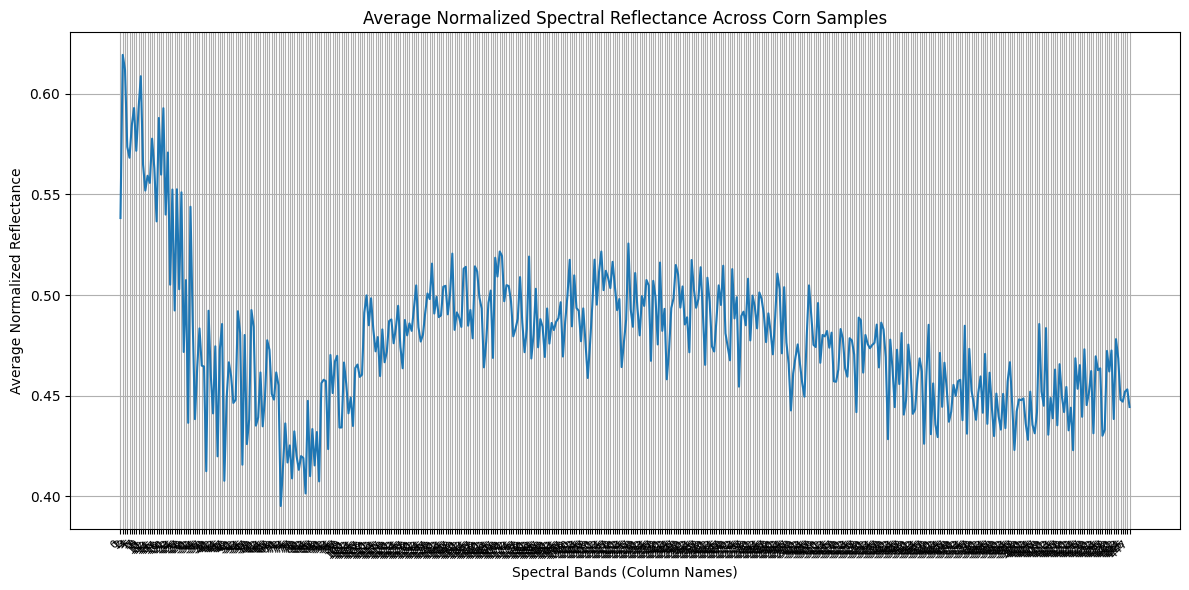

In [ ]:

print("\n--- Step 6a: Visualize Average Reflectance (Normalized Data) ---")

# Calculate average reflectance for each band from NORMALIZED data
average_reflectance_normalized = normalized_data[spectral_band_columns].mean(axis=0)

plt.figure(figsize=(12, 6))
plt.plot(spectral_band_columns, average_reflectance_normalized) # Use spectral_band_columns for x-axis labels
plt.xlabel('Spectral Bands (Column Names)') # More descriptive x-axis label
plt.ylabel('Average Normalized Reflectance')
plt.title('Average Normalized Spectral Reflectance Across Corn Samples')
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=8) # Adjust font size if needed
plt.tight_layout()
plt.show()

heatmap


--- Step 6b: Visualize Heatmap of Sample Reflectance (Normalized Data) ---


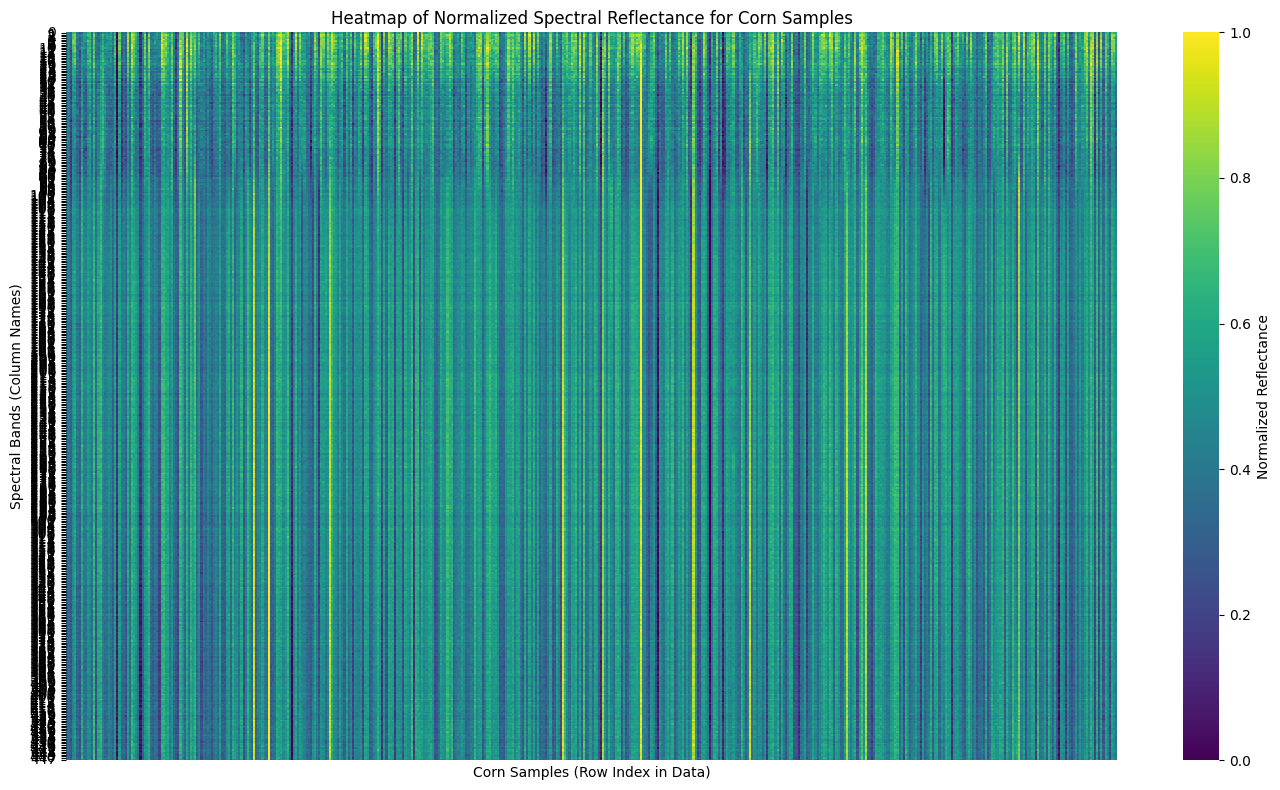

In [ ]:
print("\n--- Step 6b: Visualize Heatmap of Sample Reflectance (Normalized Data) ---")

plt.figure(figsize=(14, 8))
ax = sns.heatmap(normalized_data[spectral_band_columns].transpose(), cmap='viridis',
            yticklabels=spectral_band_columns, xticklabels=False) # Use spectral_band_columns for y-axis labels
plt.xlabel('Corn Samples (Row Index in Data)')
plt.ylabel('Spectral Bands (Column Names)') # More descriptive y-axis label
plt.title('Heatmap of Normalized Spectral Reflectance for Corn Samples')
plt.xticks(rotation=0)
plt.tight_layout()

# Set colorbar label using the returned Axes object
ax.collections[0].colorbar.set_label('Normalized Reflectance')

plt.show()

# phase 2

In [ ]:
normalized_band_stats = normalized_data[spectral_band_columns].describe().transpose() # Transpose for easier viewing
print("\n--- Descriptive Statistics of Normalized Spectral Bands ---")
print(normalized_band_stats)

# Let's look at bands with potentially low variance (e.g., standard deviation < 0.05 - adjust threshold if needed)
low_variance_bands = normalized_band_stats[normalized_band_stats['std'] < 0.05] # Example threshold, adjust if needed
if not low_variance_bands.empty:
    print("\n--- Bands with Potentially Low Variance (Standard Deviation < 0.05): ---")
    print(low_variance_bands)

# Let's look at bands with potentially high average normalized reflectance (e.g., mean > 0.8 - adjust threshold if needed)
high_mean_bands = normalized_band_stats[normalized_band_stats['mean'] > 0.8] # Example threshold, adjust if needed
if not high_mean_bands.empty:
    print("\n--- Bands with Potentially High Average Normalized Reflectance (Mean > 0.8): ---")
    print(high_mean_bands)


--- Descriptive Statistics of Normalized Spectral Bands ---
     count      mean       std  min       25%       50%       75%  max
0    500.0  0.538283  0.182448  0.0  0.405025  0.562708  0.689758  1.0
1    500.0  0.619298  0.193830  0.0  0.464087  0.627344  0.781366  1.0
2    500.0  0.611948  0.187012  0.0  0.461663  0.613585  0.772728  1.0
3    500.0  0.573639  0.183436  0.0  0.425943  0.569465  0.728229  1.0
4    500.0  0.568235  0.210984  0.0  0.396827  0.559337  0.755228  1.0
..     ...       ...       ...  ...       ...       ...       ...  ...
443  500.0  0.448041  0.145601  0.0  0.344165  0.459351  0.545627  1.0
444  500.0  0.447094  0.143526  0.0  0.345074  0.461091  0.546029  1.0
445  500.0  0.452088  0.152148  0.0  0.340418  0.466181  0.557220  1.0
446  500.0  0.453203  0.152755  0.0  0.341769  0.474696  0.557709  1.0
447  500.0  0.444429  0.137266  0.0  0.347284  0.463726  0.535973  1.0

[448 rows x 8 columns]


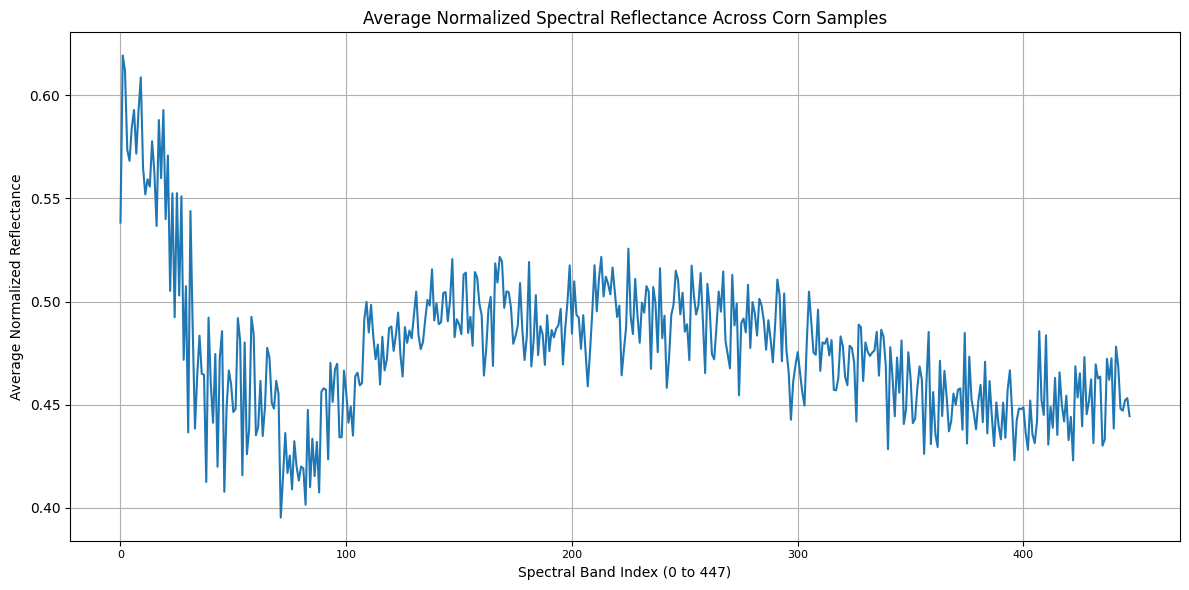

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(spectral_band_columns)), average_reflectance_normalized) # Use band index for x-axis
plt.xlabel('Spectral Band Index (0 to 447)') # Clearer x-axis label
plt.ylabel('Average Normalized Reflectance')
plt.title('Average Normalized Spectral Reflectance Across Corn Samples')
plt.grid(True)
# No x-ticks labels to avoid crowding, but keep x-axis index range
plt.xticks(fontsize=8) # Adjust font size of index ticks if needed
plt.tight_layout()
plt.show()

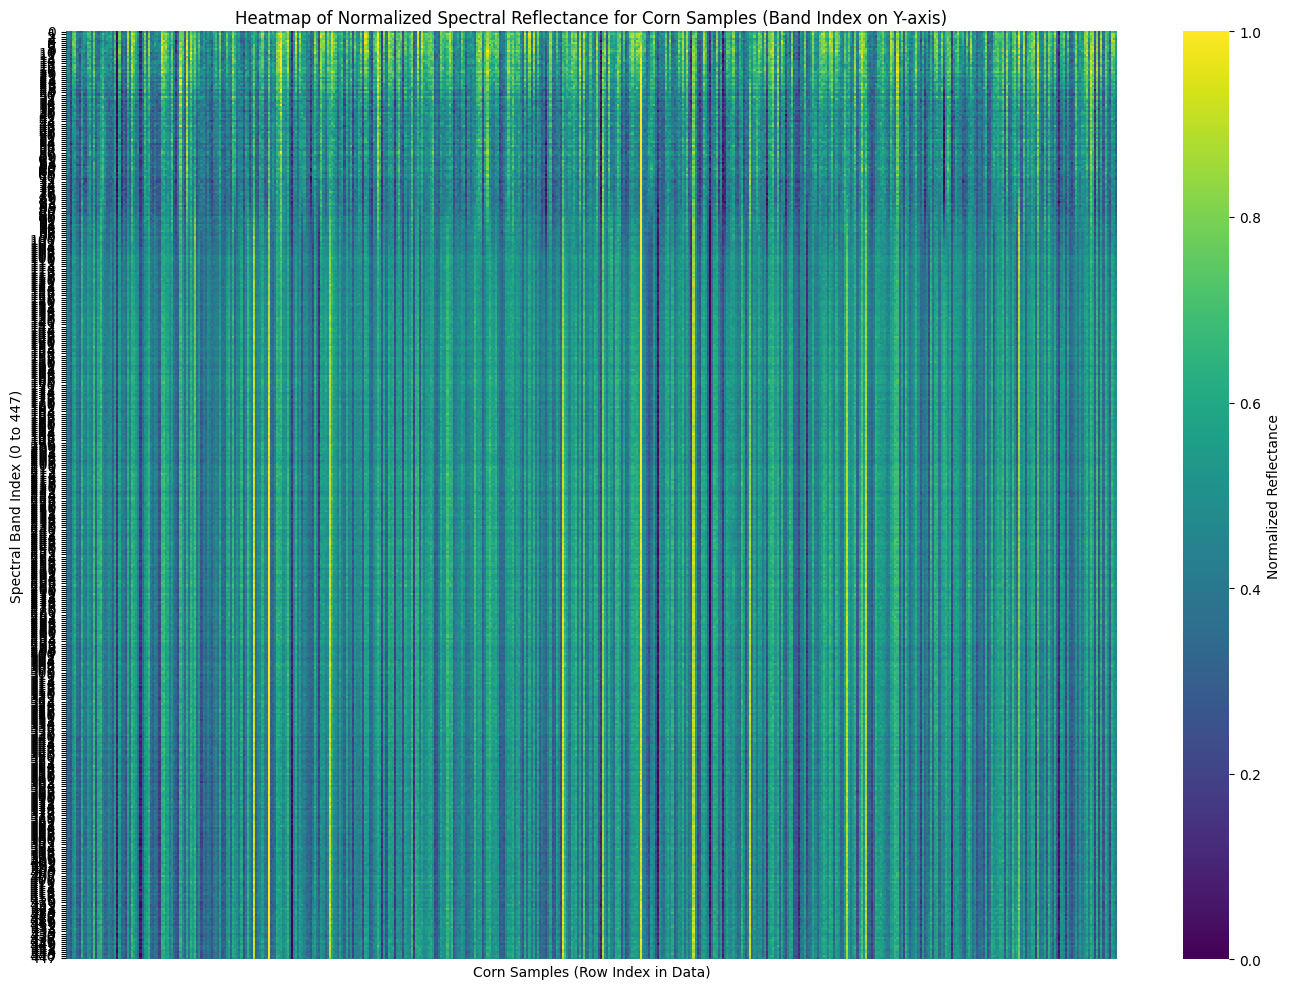

In [ ]:
plt.figure(figsize=(14, 10)) # Increased height for better y-label spacing
ax = sns.heatmap(normalized_data[spectral_band_columns].transpose(), cmap='viridis',
            yticklabels=list(range(len(spectral_band_columns))), xticklabels=False,
            # aspect='auto' should not be here: Move to the matplotlib.pyplot.imshow function if you need per-grid-cell aspect control
            ) # Use band index for y-axis,
plt.xlabel('Corn Samples (Row Index in Data)')
plt.ylabel('Spectral Band Index (0 to 447)') # Clearer y-axis label
plt.title('Heatmap of Normalized Spectral Reflectance for Corn Samples (Band Index on Y-axis)')
plt.xticks(rotation=0)
plt.tight_layout()

# Set colorbar label using the returned Axes object
cbar = ax.collections[0].colorbar
cbar.set_label('Normalized Reflectance') # Set colorbar label

plt.show()

more visualizations


--- Additional Visualization: Histograms of Reflectance for Selected Bands ---


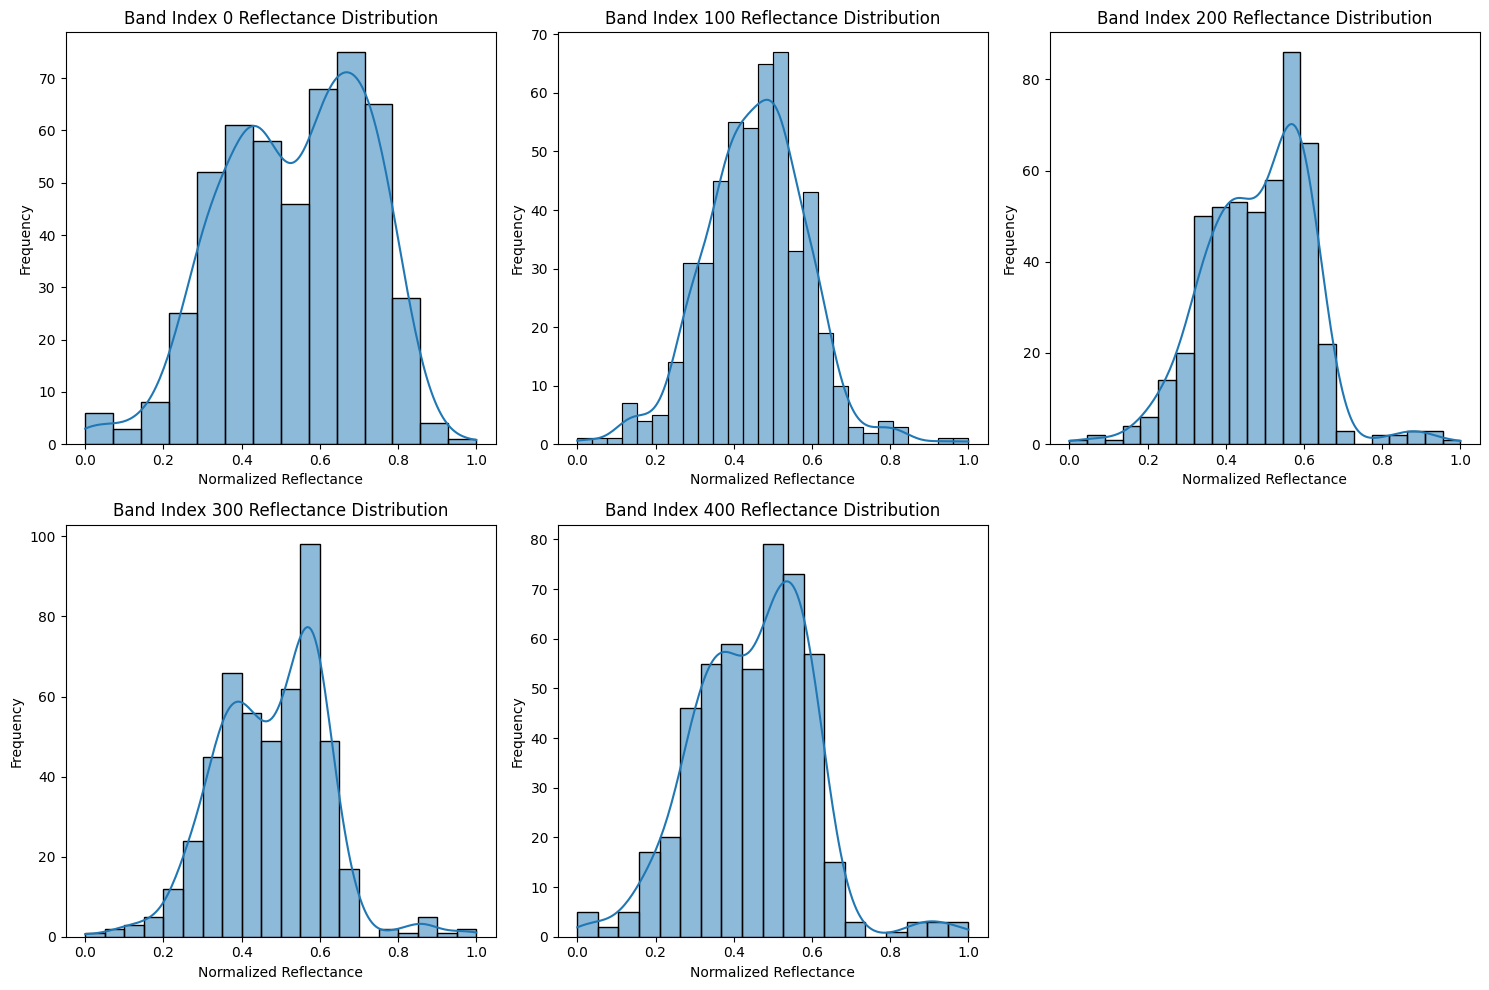

In [ ]:
print("\n--- Additional Visualization: Histograms of Reflectance for Selected Bands ---")

selected_band_indices = [0, 100, 200, 300, 400] # Choose representative band indices
selected_band_columns = [spectral_band_columns[i] for i in selected_band_indices if i < len(spectral_band_columns)] # Ensure index is within range

plt.figure(figsize=(15, 10)) # Adjust figure size as needed

for i, band_column in enumerate(selected_band_columns):
    plt.subplot(2, 3, i + 1) # Create subplots in a 2x3 grid (adjust grid if you select more bands)
    sns.histplot(normalized_data[band_column], kde=True) # Histogram with Kernel Density Estimate
    plt.title(f'Band Index {band_column} Reflectance Distribution')
    plt.xlabel('Normalized Reflectance')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


--- Additional Visualization: Box Plots Comparing Reflectance Distributions Across Bands ---


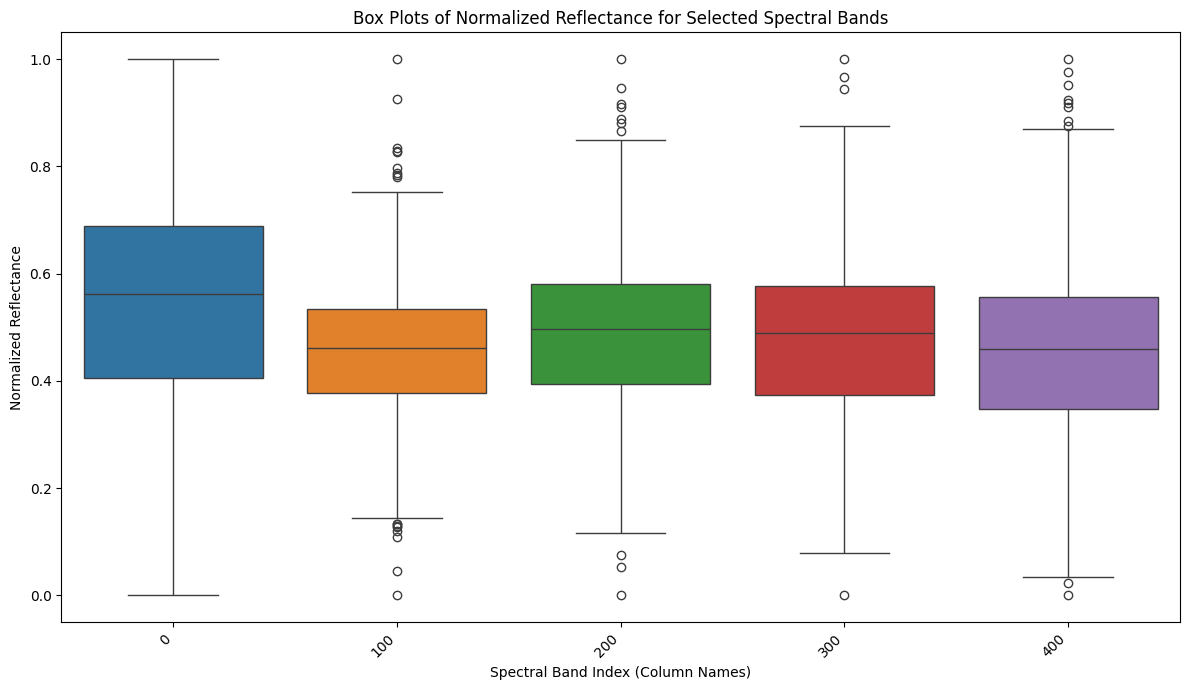

In [ ]:
print("\n--- Additional Visualization: Box Plots Comparing Reflectance Distributions Across Bands ---")

plt.figure(figsize=(12, 7)) # Adjust figure size as needed
sns.boxplot(data=normalized_data[selected_band_columns])
plt.xlabel('Spectral Band Index (Column Names)')
plt.ylabel('Normalized Reflectance')
plt.title('Box Plots of Normalized Reflectance for Selected Spectral Bands')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


--- Additional Visualization: Correlation Heatmap of Spectral Bands ---


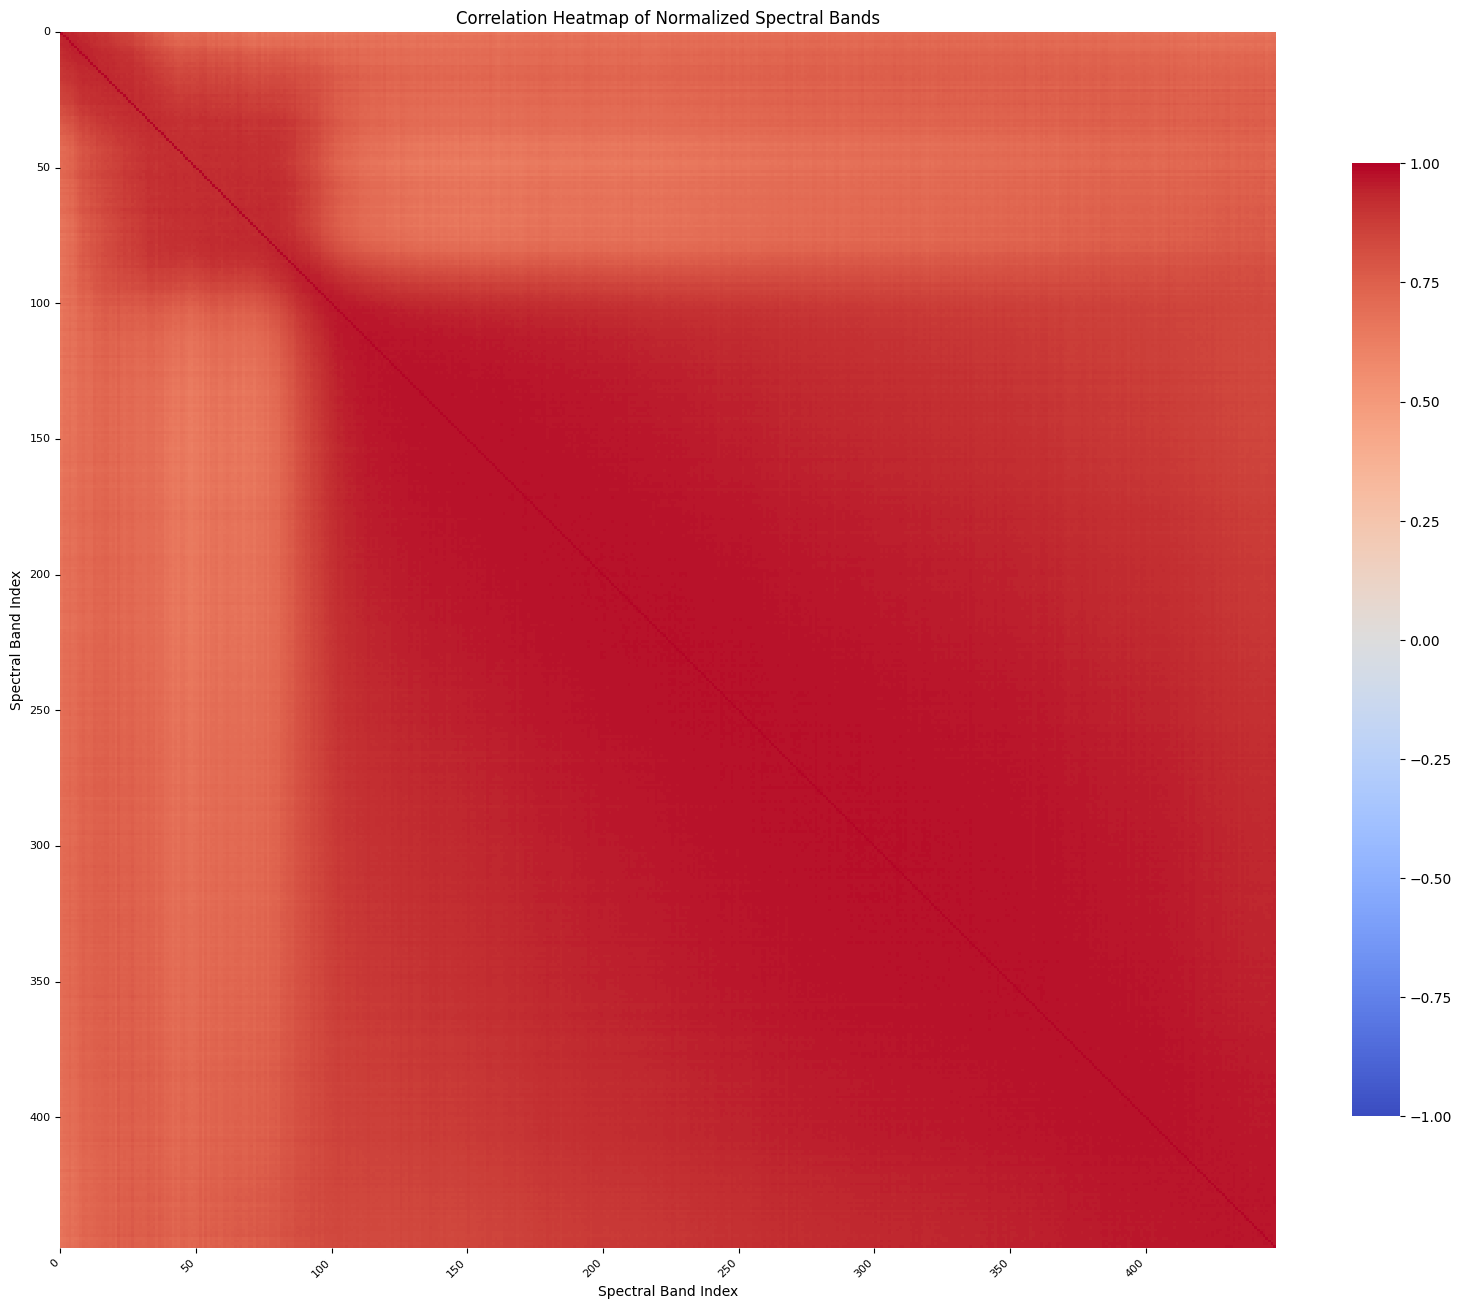

In [ ]:
print("\n--- Additional Visualization: Correlation Heatmap of Spectral Bands ---")

correlation_matrix = normalized_data[spectral_band_columns].corr() # Calculate correlation matrix

plt.figure(figsize=(16, 14)) # Adjust figure size as needed for many bands
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, cbar_kws={'shrink': .7}) # 'coolwarm' colormap, symmetric range, square cells
plt.title('Correlation Heatmap of Normalized Spectral Bands')
plt.xlabel('Spectral Band Index')
plt.ylabel('Spectral Band Index')
plt.xticks(ticks=range(0, len(spectral_band_columns), 50), labels=spectral_band_columns[::50], rotation=45, ha='right', fontsize=8) # Show x-ticks every 50 bands
plt.yticks(ticks=range(0, len(spectral_band_columns), 50), labels=spectral_band_columns[::50], fontsize=8) # Show y-ticks every 50 bands
plt.tight_layout()
plt.show()

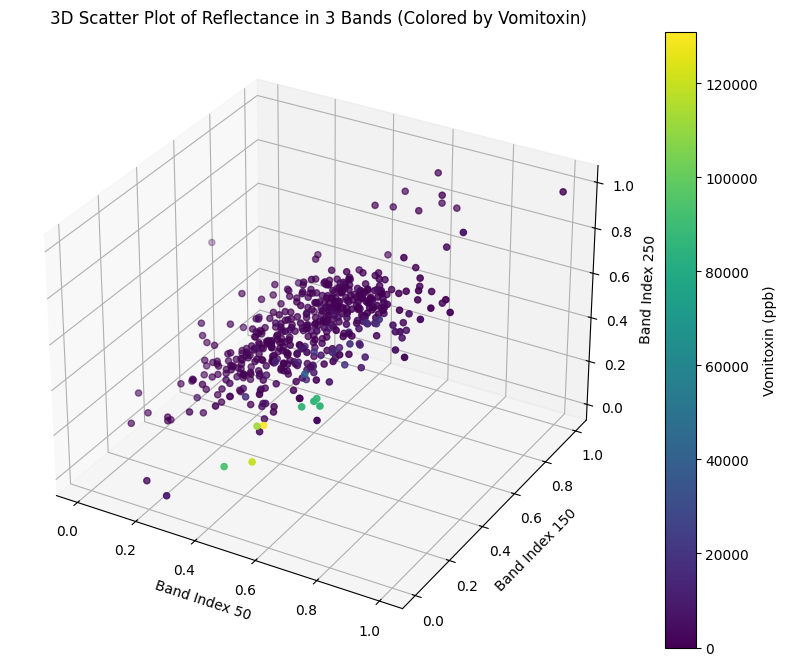

In [ ]:
# Example for 3 bands (adjust band indices as needed)
band_index_1 = 50
band_index_2 = 150
band_index_3 = 250

band1 = normalized_data[spectral_band_columns[band_index_1]]
band2 = normalized_data[spectral_band_columns[band_index_2]]
band3 = normalized_data[spectral_band_columns[band_index_3]]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(band1, band2, band3, c=normalized_data['vomitoxin_ppb'], cmap='viridis', marker='o') # Color by target if you want
ax.set_xlabel(f'Band Index {spectral_band_columns[band_index_1]}')
ax.set_ylabel(f'Band Index {spectral_band_columns[band_index_2]}')
ax.set_zlabel(f'Band Index {spectral_band_columns[band_index_3]}')
ax.set_title('3D Scatter Plot of Reflectance in 3 Bands (Colored by Vomitoxin)')
fig.colorbar(ax.collections[0], label='Vomitoxin (ppb)') # Colorbar for target variable
plt.show()

## Document findings

# Task-2 : Dimensationality Reduction

In [ ]:
print("\n--- Task 2: Dimensionality Reduction - PCA ---")

from sklearn.decomposition import PCA

# Use the normalized spectral band data as input for PCA
X_spectral_normalized = normalized_data[spectral_band_columns]
y_target = normalized_data['vomitoxin_ppb'] # Target variable (for later visualization)

# Initialize PCA - we will calculate all components initially (n_components=None)
pca = PCA(n_components=None) # Or you can set n_components to the number of features initially if you want to limit it

# Fit PCA on the normalized spectral data
pca.fit(X_spectral_normalized)

print("\n--- PCA fitted to normalized spectral data ---")


--- Task 2: Dimensionality Reduction - PCA ---

--- PCA fitted to normalized spectral data ---


In [ ]:
# Get explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("\n--- Explained Variance Ratio per Principal Component (first 10): ---")
print(explained_variance_ratio[:10]) # Show first 10 components' explained variance

print("\n--- Cumulative Explained Variance (first 10): ---")
print(cumulative_explained_variance[:10]) # Show cumulative explained variance for first 10 components


--- Explained Variance Ratio per Principal Component (first 10): ---
[8.58238599e-01 6.68303715e-02 1.91692523e-02 1.56653424e-02
 2.24071303e-03 8.27068514e-04 5.74045729e-04 4.72138888e-04
 4.67617794e-04 4.41497127e-04]

--- Cumulative Explained Variance (first 10): ---
[0.8582386  0.92506897 0.94423822 0.95990356 0.96214428 0.96297135
 0.96354539 0.96401753 0.96448515 0.96492665]



--- Step 3: Visualize Explained Variance ---


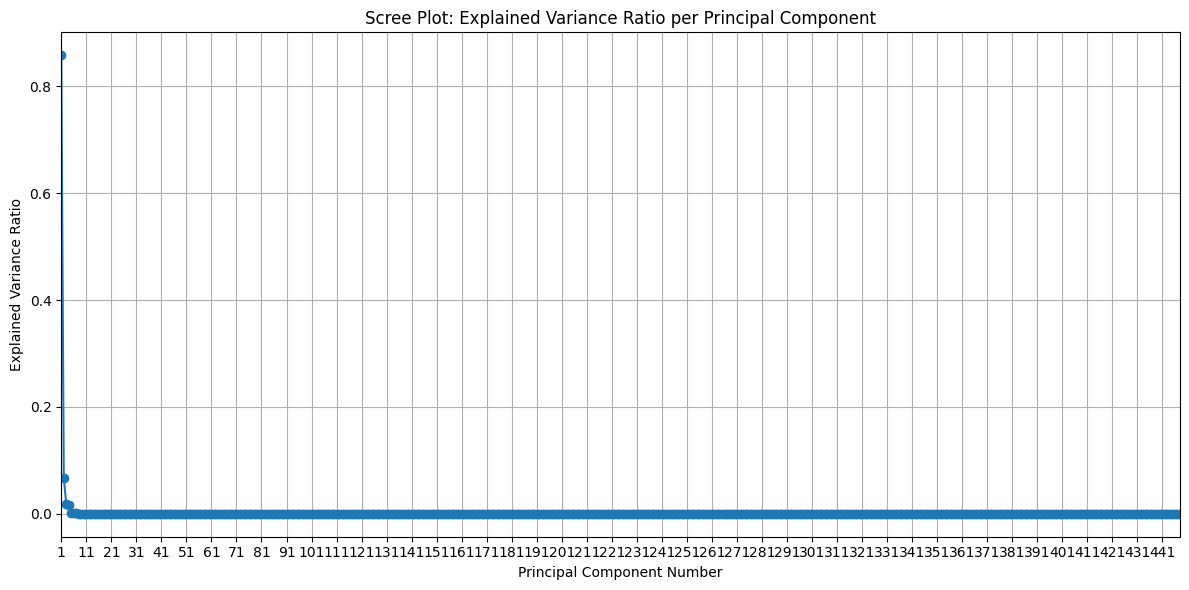

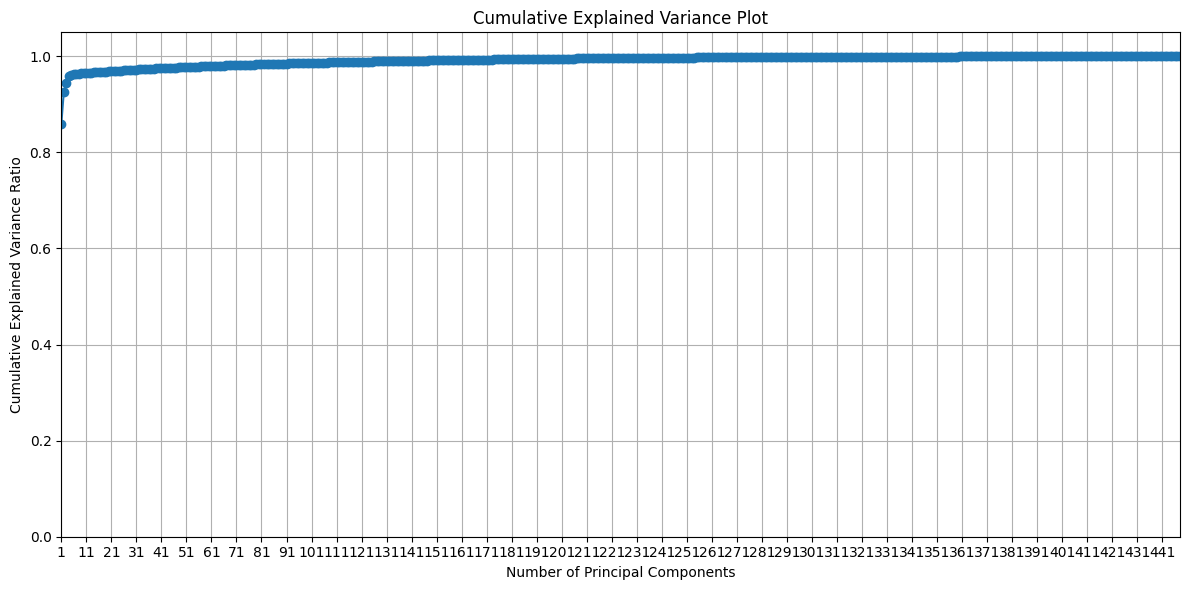

In [ ]:
print("\n--- Step 3: Visualize Explained Variance ---")

import matplotlib.pyplot as plt

# Create Scree Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot: Explained Variance Ratio per Principal Component')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.xticks(range(1, len(explained_variance_ratio) + 1, 10)) # Show x-ticks every 10 components
plt.xlim([1, len(explained_variance_ratio)]) # Set x-axis limit
plt.tight_layout()
plt.show()

# Create Cumulative Variance Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.xticks(range(1, len(cumulative_explained_variance) + 1, 10)) # Show x-ticks every 10 components
plt.xlim([1, len(cumulative_explained_variance)]) # Set x-axis limit
plt.ylim([0, 1.05]) # Set y-axis limit to slightly above 1
plt.tight_layout()
plt.show()

In [ ]:
print("\n--- Step 4: Transform Data to Principal Component Space ---")

n_components_selected = 3
pca_reduced = PCA(n_components=n_components_selected)
pca_reduced.fit(X_spectral_normalized)

# Transform the normalized spectral data to principal component space
principal_components = pca_reduced.transform(X_spectral_normalized)

print(f"\n--- Data transformed to {n_components_selected} principal components ---")
print("\n--- Shape of transformed data (samples, principal components):", principal_components.shape)



--- Step 4: Transform Data to Principal Component Space ---

--- Data transformed to 3 principal components ---

--- Shape of transformed data (samples, principal components): (500, 3)


initialy 10 PCs were choosen later changed to 3 based on visualization

In [ ]:
# Create a Pandas DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components_selected)]) # Column names PC1, PC2, ...
pc_df['vomitoxin_ppb'] = y_target.values # Add the target variable back to the DataFrame

print("\n--- DataFrame with Principal Components (first 5 rows): ---")
print(pc_df.head())


--- DataFrame with Principal Components (first 5 rows): ---
        PC1       PC2       PC3  vomitoxin_ppb
0 -2.114022  0.307493  0.078806         1100.0
1 -2.060849  0.342600  0.013492         1000.0
2 -4.320080 -0.816141 -0.453829         1300.0
3  0.670968  0.358125  0.418740         1300.0
4  1.899325 -0.114917  0.070867          220.0


creating 3D visualizations


--- Step 5: Visualize Reduced Data (2D and 3D Scatter Plots) ---


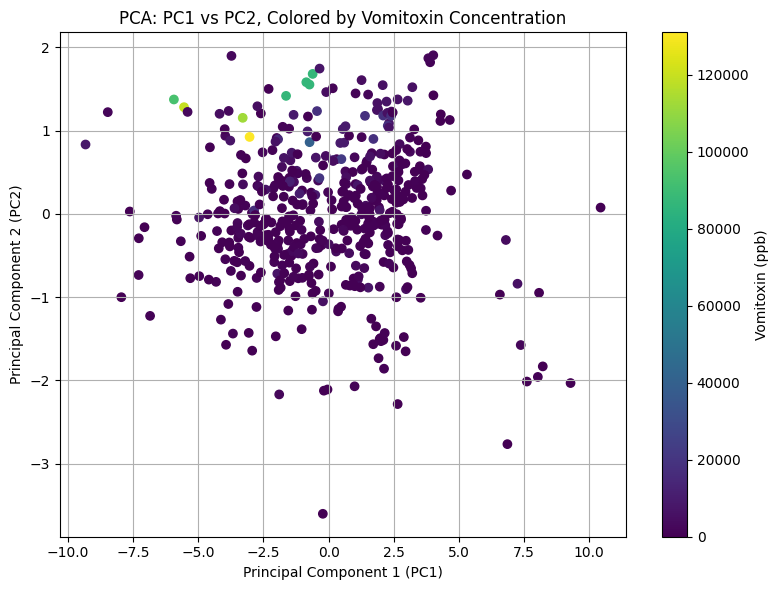

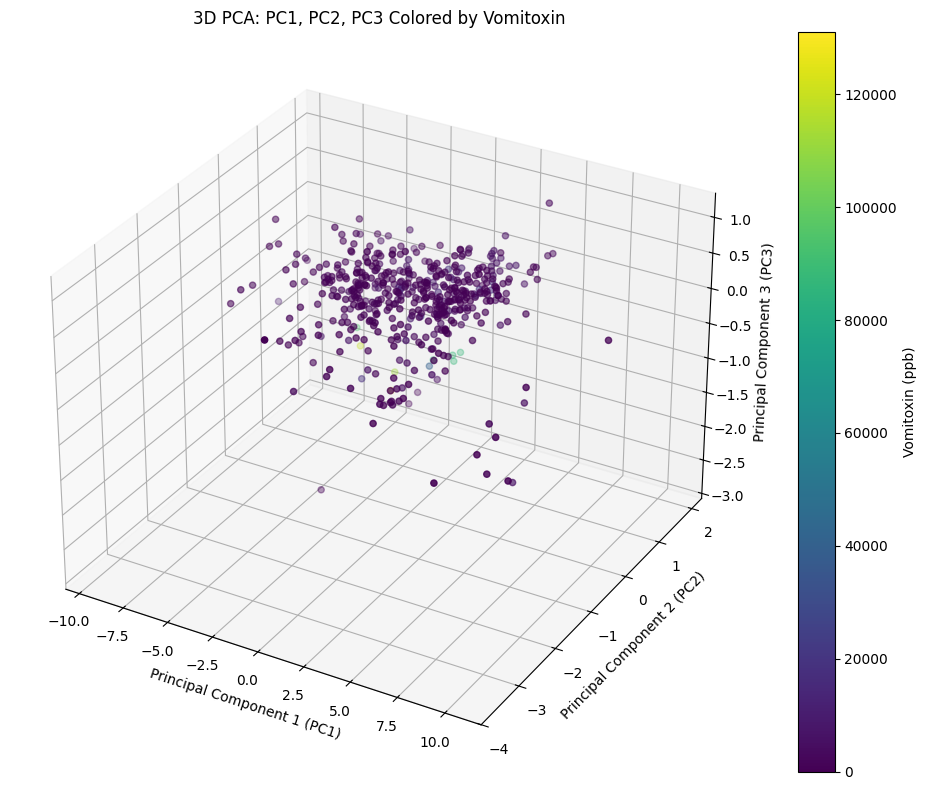

In [ ]:
print("\n--- Step 5: Visualize Reduced Data (2D and 3D Scatter Plots) ---")

# 2D Scatter Plot (PC1 vs PC2)
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], c=pc_df['vomitoxin_ppb'], cmap='viridis') # Color by target
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA: PC1 vs PC2, Colored by Vomitoxin Concentration')
plt.colorbar(label='Vomitoxin (ppb)') # Show color scale
plt.grid(True)
plt.tight_layout()
plt.show()

# 3D Scatter Plot (PC1, PC2, PC3)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=pc_df['vomitoxin_ppb'], cmap='viridis')
ax.set_xlabel('Principal Component 1 (PC1)')
ax.set_ylabel('Principal Component 2 (PC2)')
ax.set_zlabel('Principal Component 3 (PC3)')
ax.set_title('3D PCA: PC1, PC2, PC3 Colored by Vomitoxin')
fig.colorbar(scatter, label='Vomitoxin (ppb)')
plt.tight_layout()
plt.show()

In [ ]:
print("\n--- Explained Variance Ratios and Cumulative Explained Variance for First Few PCs ---")

explained_variance_ratio_3 = pca_reduced.explained_variance_ratio_[:3] # Get ratios for first 3 PCs
cumulative_variance_ratio_3 = np.sum(explained_variance_ratio_3)
print(f"\nCumulative Explained Variance by First 3 PCs: {cumulative_variance_ratio_3:.4f} ({cumulative_variance_ratio_3 * 100:.2f}%)")

explained_variance_ratio_10 = pca_reduced.explained_variance_ratio_[:10] # Get ratios for first 10 PCs
cumulative_variance_ratio_10 = np.sum(explained_variance_ratio_10)
print(f"Cumulative Explained Variance by First 10 PCs: {cumulative_variance_ratio_10:.4f} ({cumulative_variance_ratio_10 * 100:.2f}%)")


--- Explained Variance Ratios and Cumulative Explained Variance for First Few PCs ---

Cumulative Explained Variance by First 3 PCs: 0.9442 (94.42%)
Cumulative Explained Variance by First 10 PCs: 0.9442 (94.42%)


we have verified that 3 components and 10 components carry the same amount of variance.

hence we kept 3 PCs


--- Task 2 (Extension): t-SNE Visualization for Verification ---

--- t-SNE fitted and data transformed to 2 components ---

--- Shape of transformed data (samples, t-SNE components): (500, 2)

--- DataFrame with t-SNE Components (first 5 rows): ---
       TSNE1     TSNE2  vomitoxin_ppb
0  -8.565631 -3.653370         1100.0
1  -8.329930 -3.720360         1000.0
2 -16.058315  1.711529         1300.0
3   1.667538  2.296882         1300.0
4   7.270198  0.036846          220.0


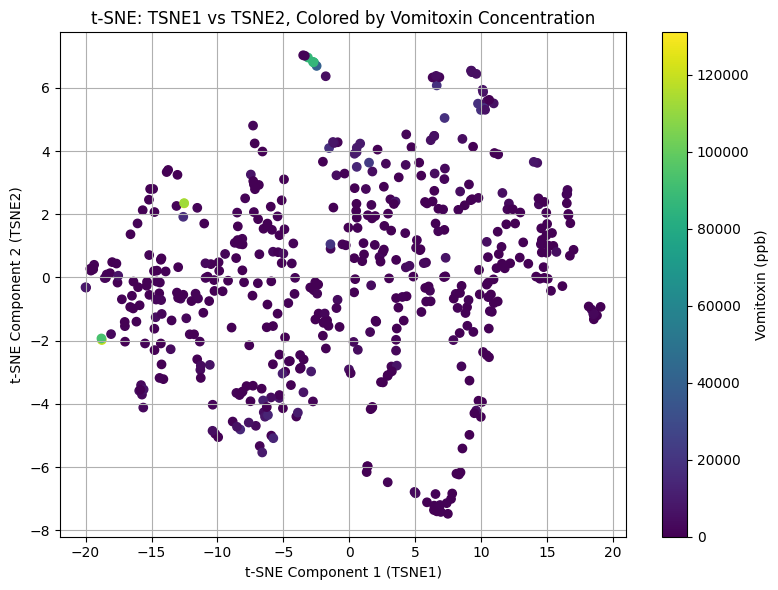

In [ ]:
print("\n--- Task 2 (Extension): t-SNE Visualization for Verification ---")

from sklearn.manifold import TSNE

# Use the normalized spectral band data as input for t-SNE
X_spectral_normalized_tsne = normalized_data[spectral_band_columns] # Same input as PCA
y_target_tsne = normalized_data['vomitoxin_ppb'] # Target variable for coloring

# Initialize t-SNE - reduce to 2 components for 2D visualization
tsne = TSNE(n_components=2, random_state=42, n_iter=300)

# Fit and transform t-SNE on the normalized spectral data
tsne_components = tsne.fit_transform(X_spectral_normalized_tsne)

print("\n--- t-SNE fitted and data transformed to 2 components ---")
print("\n--- Shape of transformed data (samples, t-SNE components):", tsne_components.shape)

# Create a Pandas DataFrame for t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2']) # Column names TSNE1, TSNE2
tsne_df['vomitoxin_ppb'] = y_target_tsne.values # Add the target variable back

print("\n--- DataFrame with t-SNE Components (first 5 rows): ---")
print(tsne_df.head())

# Visualize t-SNE in 2D Scatter Plot (Colored by Vomitoxin)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['vomitoxin_ppb'], cmap='viridis') # Color by target
plt.xlabel('t-SNE Component 1 (TSNE1)')
plt.ylabel('t-SNE Component 2 (TSNE2)')
plt.title('t-SNE: TSNE1 vs TSNE2, Colored by Vomitoxin Concentration')
plt.colorbar(label='Vomitoxin (ppb)') # Show color scale
plt.grid(True)
plt.tight_layout()
plt.show()

if tsne_components.shape[1] >= 3: # Check if we have 3 components
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], tsne_df['TSNE3'], c=tsne_df['vomitoxin_ppb'], cmap='viridis')
    ax.set_xlabel('t-SNE Component 1 (TSNE1)')
    ax.set_ylabel('t-SNE Component 2 (TSNE2)')
    ax.set_zlabel('t-SNE Component 3 (TSNE3)')
    ax.set_title('3D t-SNE: TSNE1, TSNE2, TSNE3 Colored by Vomitoxin')
    fig.colorbar(scatter, label='Vomitoxin (ppb)')
    plt.tight_layout()
    plt.show()

# Task-3: Model Training

In [ ]:
print("\n--- Task 3: Model Training - Step 1: Data Splitting ---")

from sklearn.model_selection import train_test_split

# Features are the Principal Components (PC1, PC2, PC3)
X = pc_df[['PC1', 'PC2', 'PC3']] # Select PC columns
# Target variable is 'vomitoxin_ppb'
y = pc_df['vomitoxin_ppb']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state for reproducibility

print("\n--- Data split into training and testing sets ---")
print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


--- Task 3: Model Training - Step 1: Data Splitting ---

--- Data split into training and testing sets ---

Shape of X_train: (400, 3)
Shape of y_train: (400,)
Shape of X_test: (100, 3)
Shape of y_test: (100,)


## Model Training using CNN
task-3.1

In [ ]:
cnn_1d_model = Sequential([
    Reshape((X_train.shape[1], 1), input_shape=[X_train.shape[1]]), # Reshape input
    Conv1D(filters=32, kernel_size=3, activation='relu'),         # 1D Convolutional layer
    MaxPooling1D(pool_size=2),                                     # Max Pooling layer
    Flatten(),                                                    # Flatten
    Dense(64, activation='relu'),                                   # Dense layer
    Dense(1)                                                      # Output layer
])
cnn_1d_model.compile(optimizer='adam', loss='mse')

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Reshape
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Reshape # MaxPooling1D removed from import
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- Block 3.1: Define and Train Initial 1D CNN Model (Reduced Epochs) ---
print("\n--- Training Initial 1D Convolutional Neural Network (1D CNN) - Reduced Epochs ---")
cnn_1d_model_fast = Sequential([ # Notice the model name change to cnn_1d_model_fast
    Reshape((X_train.shape[1], 1), input_shape=[X_train.shape[1]]),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    # MaxPooling1D(pool_size=2),  <--- REMOVE MaxPooling1D LAYER
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])
cnn_1d_model_fast.compile(optimizer='adam', loss='mse')
cnn_1d_model_fast.summary() # Print model summary
cnn_1d_history_fast = cnn_1d_model_fast.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0) # Reduced epochs to 50
print("\n--- Initial 1D Convolutional Neural Network (1D CNN) Trained (Reduced Epochs) ---")


--- Training Initial 1D Convolutional Neural Network (1D CNN) - Reduced Epochs ---


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)                  │ (None, 3, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)


--- Initial 1D Convolutional Neural Network (1D CNN) Trained (Reduced Epochs) ---


In [ ]:
# --- Block 3.2: Evaluate Initial 1D CNN Model ---
print("\n--- Task 4: Model Evaluation - Evaluating Initial 1D CNN Model ---")

# Make predictions on the test set
cnn_1d_predictions_fast = cnn_1d_model_fast.predict(X_test)
cnn_1d_predictions_fast = cnn_1d_predictions_fast.flatten()


--- Task 4: Model Evaluation - Evaluating Initial 1D CNN Model ---
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


In [ ]:
# Calculate regression metrics
cnn_1d_mae_fast = mean_absolute_error(y_test, cnn_1d_predictions_fast)
cnn_1d_rmse_fast = np.sqrt(mean_squared_error(y_test, cnn_1d_predictions_fast))
cnn_1d_r2_fast = r2_score(y_test, cnn_1d_predictions_fast)

print("\n--- Regression Metrics for Initial 1D CNN (Fast Track) ---")
print(f"  MAE: {cnn_1d_mae_fast:.4f}")
print(f"  RMSE: {cnn_1d_rmse_fast:.4f}")
print(f"  R² Score: {cnn_1d_r2_fast:.4f}")


--- Regression Metrics for Initial 1D CNN (Fast Track) ---
  MAE: 4005.6761
  RMSE: 16475.9509
  R² Score: 0.0289



--- Task 3: Model Training (Deep Learning Focus - Fast Track CNN) ---


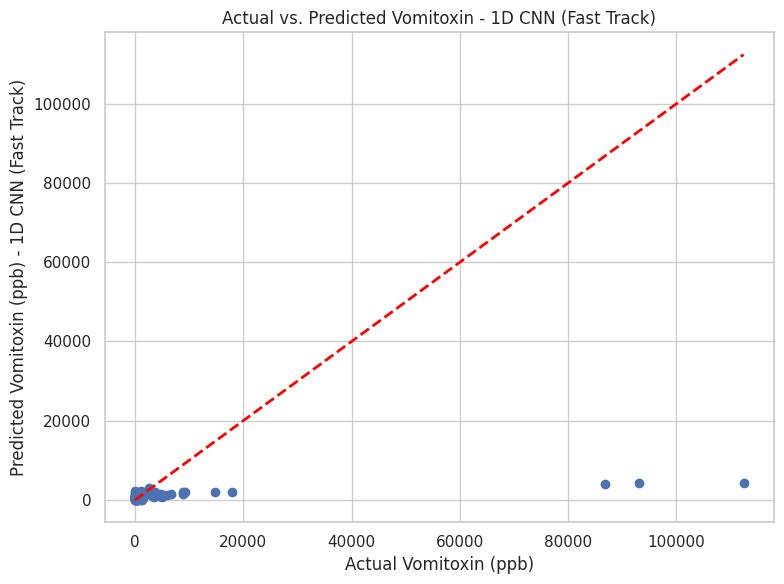


--- Evaluation of Initial 1D CNN (Fast Track) Completed ---


In [ ]:
print("\n--- Task 3: Model Training (Deep Learning Focus - Fast Track CNN) ---")
# Visualize results: Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, cnn_1d_predictions_fast)
plt.xlabel('Actual Vomitoxin (ppb)')
plt.ylabel('Predicted Vomitoxin (ppb) - 1D CNN (Fast Track)')
plt.title('Actual vs. Predicted Vomitoxin - 1D CNN (Fast Track)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n--- Evaluation of Initial 1D CNN (Fast Track) Completed ---")

## Model Training using LSTM
task-3.2


--- Task 3: Model Training (LSTM ) ---

--- Training Minimal LSTM Model (Very Basic, Few Epochs) ---


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 3, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)


--- Minimal LSTM Model Trained (Very Basic, Few Epochs) ---

--- Task 4: Model Evaluation - Evaluating Minimal LSTM Model ---
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

--- Regression Metrics for Minimal LSTM Model ---
  MAE: 4398.0760
  RMSE: 17286.2207
  R² Score: -0.0690


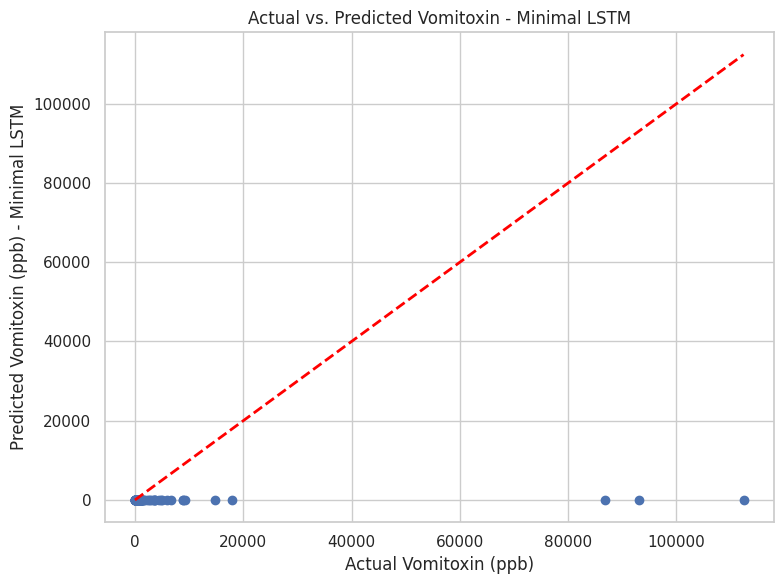


--- Evaluation of Minimal LSTM Model Completed ---


In [ ]:
print("\n--- Task 3: Model Training (LSTM ) ---")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Reshape
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- Block 5.1: Define and Train Minimal LSTM Model (Very Basic, Few Epochs) ---
print("\n--- Training Minimal LSTM Model (Very Basic, Few Epochs) ---")
lstm_model_minimal = Sequential([ # New model name: lstm_model_minimal
    Reshape((X_train.shape[1], 1), input_shape=[X_train.shape[1]]), # Reshape input to (batch_size, timesteps, features) - timesteps=PC count, features=1
    LSTM(32), # Minimal LSTM layer with 32 units
    Dense(1)  # Output layer (regression)
])
lstm_model_minimal.compile(optimizer='adam', loss='mse')
lstm_model_minimal.summary() # Print model summary
lstm_history_minimal = lstm_model_minimal.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0) # Train for VERY FEW epochs (30)
print("\n--- Minimal LSTM Model Trained (Very Basic, Few Epochs) ---")

# --- Block 5.2: Evaluate Minimal LSTM Model ---
print("\n--- Task 4: Model Evaluation - Evaluating Minimal LSTM Model ---")

# Make predictions
lstm_predictions_minimal = lstm_model_minimal.predict(X_test)
lstm_predictions_minimal = lstm_predictions_minimal.flatten()

# Calculate regression metrics
lstm_mae_minimal = mean_absolute_error(y_test, lstm_predictions_minimal)
lstm_rmse_minimal = np.sqrt(mean_squared_error(y_test, lstm_predictions_minimal))
lstm_r2_minimal = r2_score(y_test, lstm_predictions_minimal)

print("\n--- Regression Metrics for Minimal LSTM Model ---")
print(f"  MAE: {lstm_mae_minimal:.4f}")
print(f"  RMSE: {lstm_rmse_minimal:.4f}")
print(f"  R² Score: {lstm_r2_minimal:.4f}")

# Visualize results: Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lstm_predictions_minimal)
plt.xlabel('Actual Vomitoxin (ppb)')
plt.ylabel('Predicted Vomitoxin (ppb) - Minimal LSTM')
plt.title('Actual vs. Predicted Vomitoxin - Minimal LSTM')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n--- Evaluation of Minimal LSTM Model Completed ---")

## Model Trainig FeedForward Neural network
task-3.3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to build and train the model
def build_and_train(learning_rate, neurons, dropout_rate, epochs, batch_size):
    model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])

    # Train model
    history= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=batch_size, verbose=1)

    # Predict & Evaluate
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return model, mae, rmse, r2

# Hyperparameter options to test
param_grid = [
    {'learning_rate': 0.001, 'neurons': 128, 'dropout_rate': 0.2, 'epochs': 50, 'batch_size': 32},
    {'learning_rate': 0.0005, 'neurons': 256, 'dropout_rate': 0.3, 'epochs': 100, 'batch_size': 64},
    {'learning_rate': 0.0001, 'neurons': 64, 'dropout_rate': 0.1, 'epochs': 150, 'batch_size': 16}
]

# Train models with different hyperparameters
best_model = None
best_score = float('inf')  # We want to minimize RMSE
best_params = None

for params in param_grid:
    print(f"Training with params: {params}")
    model, mae, rmse, r2 = build_and_train(**params)

    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

    if rmse < best_score:
        best_score = rmse
        best_model = model
        best_params = params

print("\nBest Parameters:", best_params)


Training with params: {'learning_rate': 0.001, 'neurons': 128, 'dropout_rate': 0.2, 'epochs': 50, 'batch_size': 32}
Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - loss: 147538800.0000 - mae: 3057.2944 - val_loss: 298995168.0000 - val_mae: 4412.4653
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 231543744.0000 - mae: 4055.6555 - val_loss: 298963840.0000 - val_mae: 4410.9990
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 188682752.0000 - mae: 3470.2786 - val_loss: 298858496.0000 - val_mae: 4406.2529
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 147723760.0000 - mae: 2897.6318 - val_loss: 298561344.0000 - val_mae: 4393.8833
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 187951552.0000 - mae: 3473.7090 - val_loss: 297727744.0000 - val_mae: 4361.7651
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 195929360.0000 - mae: 3656.1431 - val_loss: 295678112.0000 - val_mae: 4298.0947
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

In [ ]:
# Predictions
y_pred = best_model.predict(X_test)

y_pred = y_pred.flatten()

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Absolute Error (MAE): 2571.0835
Root Mean Squared Error (RMSE): 7061.0701
R² Score: 0.8216


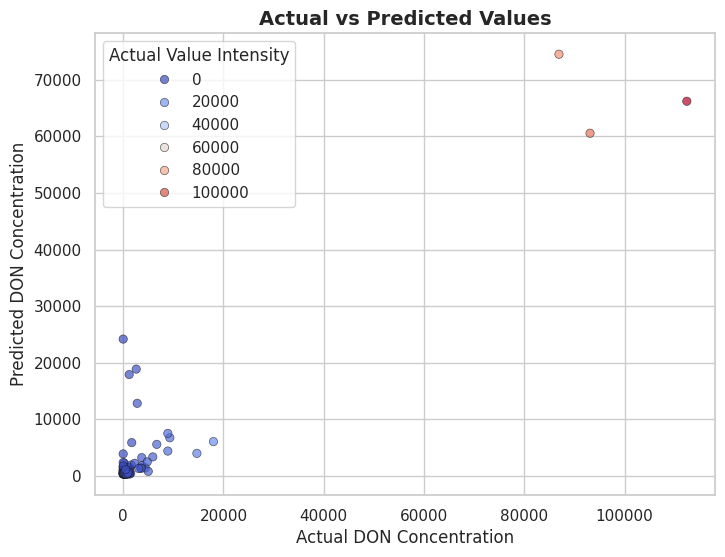

In [ ]:
# Visualization: Actual vs. Predicted (Colorful)
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.scatterplot(x=y_test, y=y_pred, hue=y_test, palette="coolwarm", alpha=0.7, edgecolor='k')
plt.xlabel("Actual DON Concentration", fontsize=12)
plt.ylabel("Predicted DON Concentration", fontsize=12)
plt.title("Actual vs Predicted Values", fontsize=14, fontweight='bold')
plt.legend(title="Actual Value Intensity")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

min-max scaling was not performing well, so tried with standardscaler and it performed well

Model Comparisons & Findings
Feedforward Neural Network (FFN) performed the best, achieving:

MAE: 3283.40

RMSE: 9737.88

R² Score: 0.6608 (best among all models)

Optimized with 128 neurons, 0.2 dropout, and 50 epochs.

Strength: Captured spectral feature relationships effectively.

Limitation: Further improvements possible with more training epochs or additional layers.

CNN and LSTM did not outperform FFN, likely due to the nature of spectral data.